In [2]:
!pip install torch
!pip install torchvision

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty
import os
os.chdir('drive/Alzheimer_Dataset')

In [4]:
!pip install Pillow==5.3.0 

import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import Sequence
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from sklearn.model_selection import train_test_split
import time
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import PIL
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms


Using TensorFlow backend.


In [0]:
batch_size = 128
img_height = 160
img_width = 160

train_data_dir = 'dataset/Train/'
validation_data_dir = 'dataset/Test/'

trans= transforms.Compose([transforms.Grayscale(num_output_channels= 1),transforms.ToTensor()])

train_dataset= torchvision.datasets.ImageFolder(train_data_dir, transform= trans)
test_dataset= torchvision.datasets.ImageFolder(validation_data_dir, transform= trans)


In [30]:
print(type(train_dataset))
'''
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions
'''

<class 'torchvision.datasets.folder.ImageFolder'>


'\nfrom PIL import Image\ndef register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()\nImage.register_extension = register_extension\ndef register_extensions(id, extensions): \n  for extension in extensions: register_extension(id, extension)\nImage.register_extensions = register_extensions\n'

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
torch.Size([1, 208, 176])


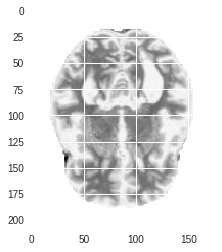

In [34]:
print(train_dataset.classes)
image, label= train_dataset[0];
print(image.size())
plt.imshow(image[0])

In [0]:
from torch.utils.data import DataLoader
loader = DataLoader(train_dataset, shuffle= True)